In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

CELL BELOW:
initiate node count, and connection between nodes (edge)
>AS DEPICTED SA FLOWCHART, AMO JA ANG "Initialize data structures and variables", kag other initializations and declarations is sa may dalom.

In [3]:
#num_nodes2 = 10
#edges2 = [(1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (2, 7),
#         (3, 7), (3, 8), (4, 9), (5, 6), (7, 10), (9, 10)]   Save for later, demonstration lang ja nga pwede ka pili sa duwa ka set kang dictionary/graph
num_nodes = 20
edges = [(1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (2, 7), (6, 14), (8, 17),
         (3, 7), (3, 8), (4, 9), (5, 6), (7, 10), (9, 10), (10, 11), (11, 12),
         (11, 13), (11, 14), (12, 15), (12, 16), (12, 17), (9, 18), (10, 12),
         (13, 17), (13, 18), (14, 19), (15, 16), (17, 20), (19, 20), (7, 19)]

CELL BELOW:
define class "Graph" nga mag generate kang graph for our bidirectional BFS which would be using edges to generate paths which will define the look of the graph
>Graph(): generate an adjacency list nga mangin main framework kang graph

In [4]:
class Graph: #class nga gahimo kang adjacency list graph contains functions...
    def __init__(self, num_nodes, edges): #tana ja ang constructor
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes + 1)]
        for n1, n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)
        self.data.pop(0) #pop ko kay di kaya isipon kang range and num_nodes kay ga array counting sha ya (from 0) te i +1 ko. te tapos maappend ako don, mahimo paths, gahimo sha blank nga path sa una as result kang pag +1 sa range so kinanglan i-pop otherwise detrimental tana sasequences karon.
        #example, may num_nodes ako nga 10, mahimo ran nga 0 to 9 pero i + 1 ko para mahimo nga 0-10 tapos i pop(0) ko para i delete ang zero para mahimo nga 1-10 ezpz
    
    def __repr__(self): #function nga ginarewrite and data into dictionary syntax or adjacency list
        return"\n".join(["{}: {}".format(n+1, neighbors) for n, neighbors in enumerate(self.data)])
    
    def __str__(self): #function nga ginatawag ang __repr__ automatically
        return self.__repr__()
    
    def get_adjacency_list(self):
        adjacency_list = {}
        for n, neighbors in enumerate(self.data):
            adjacency_list[n + 1] = neighbors
        return adjacency_list

g1 = Graph(num_nodes, edges)
graph = g1.get_adjacency_list() #reassign contents kang g1 into adjacency list format para ma pass tana sa later functions kay apparently ang BFS kag BiBFS na ginhimo ko only works around adjacency list
print("g1.data Adjacency List:\n(Node: [Neighbor Node, Neighbor Node, ...])")
print(g1)
print("graph Adjacency List: \n(Node: [Neighbor Node, Neighbor Node, ...])")
print(graph)

g1.data Adjacency List:
(Node: [Neighbor Node, Neighbor Node, ...])
1: [2, 3, 4]
2: [1, 5, 6, 7]
3: [1, 7, 8]
4: [1, 9]
5: [2, 6]
6: [2, 14, 5]
7: [2, 3, 10, 19]
8: [17, 3]
9: [4, 10, 18]
10: [7, 9, 11, 12]
11: [10, 12, 13, 14]
12: [11, 15, 16, 17, 10]
13: [11, 17, 18]
14: [6, 11, 19]
15: [12, 16]
16: [12, 15]
17: [8, 12, 13, 20]
18: [9, 13]
19: [14, 20, 7]
20: [17, 19]
graph Adjacency List: 
(Node: [Neighbor Node, Neighbor Node, ...])
{1: [2, 3, 4], 2: [1, 5, 6, 7], 3: [1, 7, 8], 4: [1, 9], 5: [2, 6], 6: [2, 14, 5], 7: [2, 3, 10, 19], 8: [17, 3], 9: [4, 10, 18], 10: [7, 9, 11, 12], 11: [10, 12, 13, 14], 12: [11, 15, 16, 17, 10], 13: [11, 17, 18], 14: [6, 11, 19], 15: [12, 16], 16: [12, 15], 17: [8, 12, 13, 20], 18: [9, 13], 19: [14, 20, 7], 20: [17, 19]}


CELL BELOW:
Generate a matplotlib + networkx visual aid for the graph.

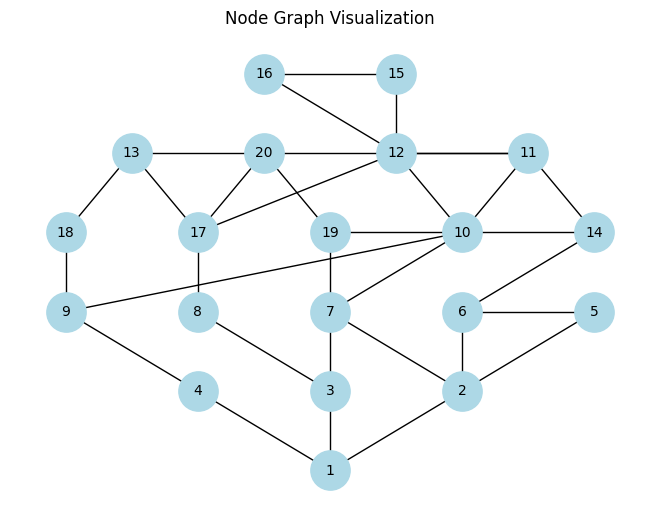

In [5]:
nx_graph = nx.Graph()

nx_graph.add_nodes_from(range(1, g1.num_nodes + 1))

for node, neighbors in enumerate(g1.data, start=1):
    for neighbor in neighbors:
        nx_graph.add_edge(node, neighbor)

generations = {}  # Dictionary to store the generation of each node
bfs_tree = nx.bfs_tree(nx_graph, source=1)
for node in bfs_tree.nodes:
    generations[node] = len(nx.shortest_path(bfs_tree, 1, node)) - 1

nx_graph_with_attributes = nx.Graph()
for node, generation in generations.items():
    nx_graph_with_attributes.add_node(node, generation=generation)

for edge in nx_graph.edges:
    nx_graph_with_attributes.add_edge(edge[0], edge[1])

pos = nx.multipartite_layout(nx_graph_with_attributes, subset_key="generation", align="horizontal")

# Draw the graph using matplotlib
nx.draw(nx_graph_with_attributes, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_color='black')
plt.title("Node Graph Visualization")
plt.show()

CELL BELOW:
Ija adjust kang start kag end/target node para sa BFS ogey

In [78]:
BFS_Start = 18
BFS_Target = 5

CELL BELOW:
BFS

In [79]:
def BFS(graph, BFS_Start, BFS_Target):
    global BFSPath #extract ang BFSPath para magamit outside kang bfs function (in this case, for purely visual representation, i extract ta ang BFS path para maprint out tana sa graph)
    visited = set()
    queue = deque([(BFS_Start, [BFS_Start])])

    while queue:
        node, path = queue.popleft()
        if node == BFS_Target:
            print("Shortest path:", ' -> '.join(map(str, path)))
            BFSPath = path
            return
        if node not in visited:
            visited.add(node)
            for child in graph.get(node, []):
                if child not in visited:
                    new_path = path + [child]
                    queue.append((child, new_path))

CELL BELOW:
PRINT BFS

In [80]:
BFS(graph, BFS_Start, BFS_Target)
print("Extracted BFS Path (List):", BFSPath)

Shortest path: 18 -> 9 -> 4 -> 1 -> 2 -> 5
Extracted BFS Path (List): [18, 9, 4, 1, 2, 5]


CELL BELOW: Visualize the Path

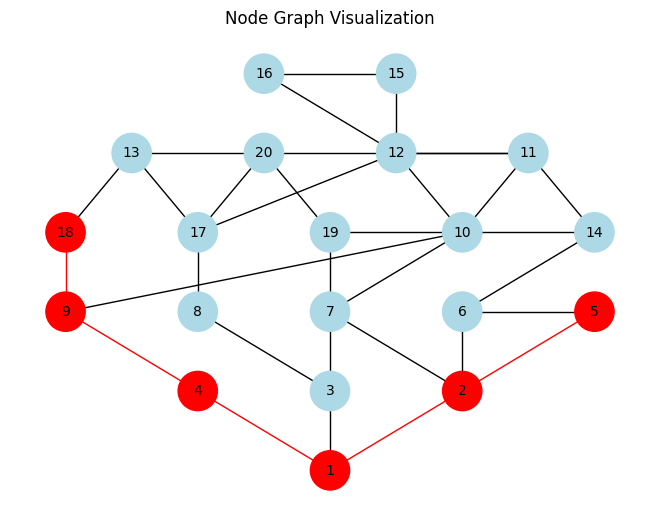

In [81]:
nx_graph = nx.Graph()

nx_graph.add_nodes_from(range(1, g1.num_nodes + 1))

for node, neighbors in enumerate(g1.data, start=1):
    for neighbor in neighbors:
        nx_graph.add_edge(node, neighbor)

generations = {}  # Dictionary to store the generation of each node
bfs_tree = nx.bfs_tree(nx_graph, source=1)
for node in bfs_tree.nodes:
    generations[node] = len(nx.shortest_path(bfs_tree, 1, node)) - 1

nx_graph_with_attributes = nx.Graph()
for node, generation in generations.items():
    nx_graph_with_attributes.add_node(node, generation=generation)

for edge in nx_graph.edges:
    nx_graph_with_attributes.add_edge(edge[0], edge[1])

pos = nx.multipartite_layout(nx_graph_with_attributes, subset_key="generation", align="horizontal")

# Create a list of edge colors
edge_colors = ['red' if src in BFSPath and dst in BFSPath else 'black' for src, dst in nx_graph_with_attributes.edges()]

# Draw the graph using matplotlib with specified edge colors
node_colors = ['red' if node in BFSPath else 'lightblue' for node in nx_graph_with_attributes.nodes()]
nx.draw(nx_graph_with_attributes, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=10, font_color='black', edge_color=edge_colors)
plt.title("Node Graph Visualization")
plt.show()

CELL BELOW:
BIDIRECTIONAL ATTEMPT

CELL BELOW:
>According sa flowchart, amoja ang mangin lever for "Select Start and Goal Nodes"

In [230]:
BiBFS_Start = 18
BiBFS_Target = 5

CELLS BELOW:
>BiBFS Implementation

In [231]:
#------------------------------(Main Function)
def bidirectional_BFS(graph, BFS_Start, BFS_Target):
    global shortest_backward_path
    global forward_path
    global backward_path
    Forward_visited = set()
    Backward_visited = set()
    ForwardBFS = deque([(BiBFS_Start, [BiBFS_Start])])
    BackwardBFS = deque([(BiBFS_Target, [BiBFS_Target])])
#(Dis da loop nga ginabalikan kang forward kag backwflip queues, ija sanda ga backtrack pag makita nanda don ang goal nodes nanda. tana ang ga construct kang path galin sa goal node (intersection kay bibfs) pakadto sa start node by generations lala basta literal nga duwa ka bfs ah)
    while ForwardBFS and BackwardBFS:
        forward_node, forward_path = ForwardBFS.popleft()
        backward_node, backward_path = BackwardBFS.popleft()
#------------------------------

#------------------------------(Path Found || Forward and/or Backward queues naglove at first sight)
        if forward_node in Backward_visited or forward_node == backward_node or backward_node in Forward_visited:
            #ja isugpon ang backward kag forward bfs
            common_node = forward_node
            #Reconstruction kang combined path nanda darwa
            backward_path.reverse()  #baliskada gha (kay ang queue kang backward nakapa suli te baliskadon antes takod)
            backward_path.pop(0)
            shortest_backward_path = forward_path + backward_path  #basically, ang [1:] idya is ginatudlo na lang tanan nga index kang list 1 index to the right kang list para ma ignore ang index 0 which is ang intersection node, which is isa run ka duplicate at this point
            shortest_forward_path = shortest_backward_path[::-1] #izi bansuli
            print("Shortest BFS Path (Forward):", ' -> '.join(map(str, shortest_forward_path))) #amoja ga print kang tanan nga sulod kang list nga shortest_path which is combined contents kang backward kag forward BFS queues.
            #####>>>> IMPORTANTE:
            print("Shortest BFS Path (Backward):", ' -> '.join(map(str, shortest_backward_path))) #kag ja ang path from Target to Start
            #####>>>> IMPORTANTE: KUNG MAG-UBRA DON KANG TIME-COMPLEXITY MEASUREMENTS I DISABLE ANG LINE NGA JA KAY ADDITIONAL LANG JA SA PROGRAM NGA JA, HINDI SANDA MAG  TIMBANG KANG BFS KAR ON.
            return
#------------------------------

#------------------------------(Forward Queue)
        if forward_node not in Forward_visited:
            Forward_visited.add(forward_node)
            for child in graph.get(forward_node, []):
                if child not in Forward_visited:
                    new_path = forward_path + [child]
                    ForwardBFS.append((child, new_path))
#------------------------------

#------------------------------(Backward Queue)
        if backward_node not in Backward_visited:
            Backward_visited.add(backward_node)
            for parent in graph.get(backward_node, []):
                if parent not in Backward_visited:
                    new_path = backward_path + [parent]
                    BackwardBFS.append((parent, new_path))
#------------------------------

bidirectional_BFS(graph, BFS_Start, BFS_Target)

Shortest BFS Path (Forward): 5 -> 2 -> 1 -> 1 -> 4 -> 9 -> 18
Shortest BFS Path (Backward): 18 -> 9 -> 4 -> 1 -> 1 -> 2 -> 5


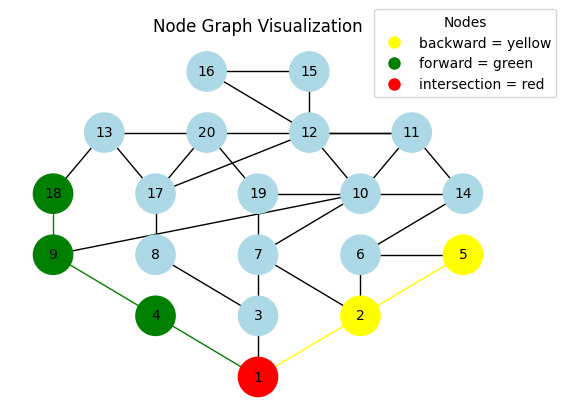

In [232]:
nx_graph = nx.Graph()

legend_colors = {'yellow': 'backward', 'green': 'forward', 'red': 'intersection'}

# Create a legend based on the defined colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{label} = {color}', markersize=10, markerfacecolor=color) for color, label in legend_colors.items()]

nx_graph.add_nodes_from(range(1, g1.num_nodes + 1))

for node, neighbors in enumerate(g1.data, start=1):
    for neighbor in neighbors:
        nx_graph.add_edge(node, neighbor)

generations = {}  # Dictionary to store the generation of each node
bfs_tree = nx.bfs_tree(nx_graph, source=1)
for node in bfs_tree.nodes:
    generations[node] = len(nx.shortest_path(bfs_tree, 1, node)) - 1

nx_graph_with_attributes = nx.Graph()
for node, generation in generations.items():
    nx_graph_with_attributes.add_node(node, generation=generation)

for edge in nx_graph.edges:
    nx_graph_with_attributes.add_edge(edge[0], edge[1])

pos = nx.multipartite_layout(nx_graph_with_attributes, subset_key="generation", align="horizontal")

# Create a list of edge colors
edge_colors = ['yellow' if src in backward_path and dst in backward_path else 'green' if src in forward_path and dst in forward_path else 'black' for src, dst in nx_graph_with_attributes.edges()]

# Draw the graph using matplotlib with specified edge colors
node_colors = ['red' if node in backward_path[:1] else 'yellow' if node in backward_path else 'green' if node in forward_path else 'lightblue' for node in nx_graph_with_attributes.nodes()]
plt.legend(handles=legend_elements, title="Nodes", loc='upper left', bbox_to_anchor=(0.72, 1.1))
nx.draw(nx_graph_with_attributes, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=10, font_color='black', edge_color=edge_colors)
plt.title("Node Graph Visualization")
plt.show()

In [233]:
import profile

print("Bidirectional:")
profile.run("bidirectional_BFS(graph, BFS_Start, BFS_Target)")

Bidirectional:
Shortest BFS Path (Forward): 5 -> 2 -> 1 -> 1 -> 4 -> 9 -> 18
Shortest BFS Path (Backward): 18 -> 9 -> 4 -> 1 -> 1 -> 2 -> 5
         145 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 2409534357.py:2(bidirectional_BFS)
        8    0.000    0.000    0.000    0.000 :0(__exit__)
       13    0.000    0.000    0.000    0.000 :0(add)
       28    0.000    0.000    0.000    0.000 :0(append)
        1    0.000    0.000    0.000    0.000 :0(exec)
       13    0.000    0.000    0.000    0.000 :0(get)
        8    0.000    0.000    0.000    0.000 :0(getpid)
        8    0.000    0.000    0.000    0.000 :0(isinstance)
        2    0.000    0.000    0.000    0.000 :0(join)
        8    0.000    0.000    0.000    0.000 :0(len)
        1    0.000    0.000    0.000    0.000 :0(pop)
       16    0.000    0.000    0.000    0.000 :0(popleft)
        2    

In [234]:
print("BFS:")
profile.run("BFS(graph, BFS_Start, BFS_Target)")

BFS:
Shortest path: 18 -> 9 -> 4 -> 1 -> 2 -> 5
         135 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 2953787484.py:1(BFS)
        4    0.000    0.000    0.000    0.000 :0(__exit__)
       19    0.000    0.000    0.000    0.000 :0(add)
       30    0.000    0.000    0.000    0.000 :0(append)
        1    0.000    0.000    0.000    0.000 :0(exec)
       19    0.000    0.000    0.000    0.000 :0(get)
        4    0.000    0.000    0.000    0.000 :0(getpid)
        4    0.000    0.000    0.000    0.000 :0(isinstance)
        1    0.000    0.000    0.000    0.000 :0(join)
        4    0.000    0.000    0.000    0.000 :0(len)
       28    0.000    0.000    0.000    0.000 :0(popleft)
        1    0.000    0.000    0.000    0.000 :0(print)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
        4    0.000    0.000    0.000    0.000 :0(write)


runtime-wise, bidirectional BFS is better than one way BFS because two BFSs are being run to finish tasks simulataneously.
>Comparison:

>BFS Runtime = O(B^D)

>BiBFS Runtime = o(B^(D/2))

>==

>2^10 = 1024

>2^(10/2) = 2^5 = 1024
